In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, boxcox


In [7]:
#Create & Load Dataset with Some Missing Values and Outliers
# Simulate data
np.random.seed(42)
data = {
    "Student_ID": range(1, 101),
    "Age": np.random.randint(18, 25, 100),
    "Gender": np.random.choice(["Male", "Female"], 100),
    "Hours_Studied": np.append(np.random.normal(3, 1, 95), [12, 14, 15, 1, 0]),  # outliers added
    "Attendance": np.random.uniform(60, 100, 100),
    "Test_Score": np.append(np.random.normal(70, 10, 97), [30, 32, 28]),  # outliers
    "GPA": np.random.normal(3.0, 0.5, 100)
}

df = pd.DataFrame(data)

# Introduce some missing values
df.loc[5, 'Hours_Studied'] = np.nan
df.loc[10, 'Attendance'] = np.nan
df.loc[15, 'Test_Score'] = np.nan

print(df.head())


   Student_ID  Age  Gender  Hours_Studied  Attendance  Test_Score       GPA
0           1   24  Female       4.477894   83.076155   84.535341  2.990492
1           2   21  Female       2.481730   79.700708   74.438194  2.498735
2           3   22    Male       2.191506   67.809720   77.746341  2.990743
3           4   24  Female       2.498243   88.898085   60.730695  2.855671
4           5   20    Male       3.915402   71.230894   69.404746  3.161359


In [8]:
#Scan for Missing Values
print("Missing Values:\n", df.isnull().sum())

# Handle missing values: Impute with median
df['Hours_Studied'].fillna(df['Hours_Studied'].median(), inplace=True)
df['Attendance'].fillna(df['Attendance'].median(), inplace=True)
df['Test_Score'].fillna(df['Test_Score'].median(), inplace=True)


Missing Values:
 Student_ID       0
Age              0
Gender           0
Hours_Studied    1
Attendance       1
Test_Score       1
GPA              0
dtype: int64


<ipython-input-8-824e9c5dbf32>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hours_Studied'].fillna(df['Hours_Studied'].median(), inplace=True)
<ipython-input-8-824e9c5dbf32>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [9]:
#Scan for Outliers (Z-score method)
# Z-score for outlier detection
numeric_cols = ['Hours_Studied', 'Test_Score', 'GPA']
z_scores = df[numeric_cols].apply(zscore)
outliers = (z_scores.abs() > 3)

print("Outliers Detected:\n", outliers.sum())

# Cap outliers (Winsorization - clip to 1st and 99th percentile)
for col in numeric_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)


Outliers Detected:
 Hours_Studied    3
Test_Score       3
GPA              0
dtype: int64


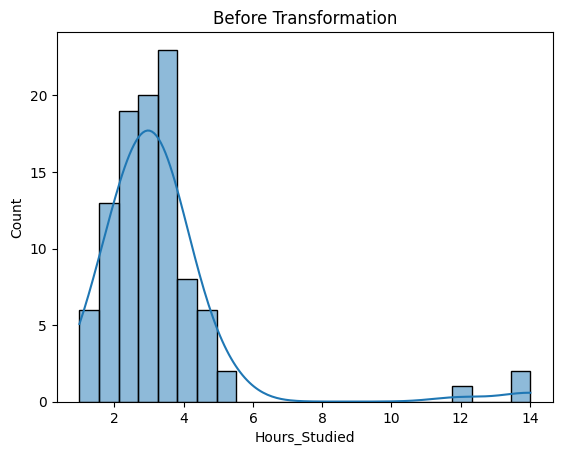

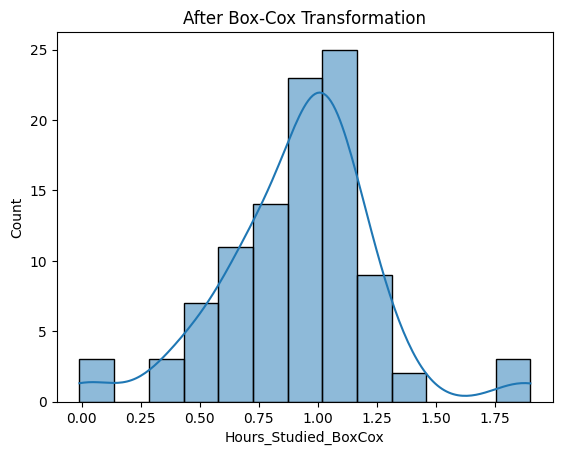

In [10]:
#Apply Data Transformation (Box-Cox for Hours_Studied)
# Box-Cox transformation (requires positive values)
from scipy.stats import boxcox

# Ensure Hours_Studied > 0
df['Hours_Studied'] = df['Hours_Studied'].apply(lambda x: x if x > 0 else 0.1)
df['Hours_Studied_BoxCox'], _ = boxcox(df['Hours_Studied'])

# Plot distributions
sns.histplot(df['Hours_Studied'], kde=True)
plt.title("Before Transformation")
plt.show()

sns.histplot(df['Hours_Studied_BoxCox'], kde=True)
plt.title("After Box-Cox Transformation")
plt.show()
